In [1]:
from pylab import plot, show, xlabel, ylabel, title, hist, hist2d
from random import random
from math import sqrt

In [2]:
def randomWalker2D(steps):
    rand=random()    #0~1사이의 임의의 숫자를 가진다
    xpos=0    #x의 위치를 담을 변수
    ypos=0    #y의 위치를 담을 변수
    pre_move=0    #이전의 움직임을 담을 변수. 1 : x방향으로 1만큼, 2 : x방향으로 -1만큼, 3 : y방향으로 1만큼, 4 : y방향으로 -1만큼
    xposlist=list()    #x의 모든 위치를 담을 리스트
    yposlist=list()    #y의 모든 위치를 담을 리스트
    
    #맨 첫번째 움직임. 이 때는 모두가 같은 확률을 가진다
    if rand<0.25:
        xpos+=1
        pre_move=1
    elif rand<0.5:
        xpos-=1
        pre_move=2
    elif rand<0.75:
        ypos+=1
        pre_move=3
    else:
        ypos-=1
        pre_move=4
        
    xposlist.append(xpos)
    yposlist.append(ypos)
    
    #이후의 움직임. 1번 움직였기 때문에 steps-1번만큼 반복한다
    for i in range(steps-1):
        rand=random()
        if pre_move==1:
            if rand<0.4:    #이전 움직임이 x++였기 때문에 x++의 확률을 2/5로, 나머지를 1/5로
                xpos+=1
                pre_move=1
            elif rand<0.6:
                xpos-=1
                pre_move=2
            elif rand<0.8:
                ypos+=1
                pre_move=3
            else:
                ypos-=1
                pre_move=4
        elif pre_move==2:    #이전 움직임이 x--였기 때문에 x--의 확률을 2/5로, 나머지를 1/5로
            if rand<0.2:
                xpos+=1
                pre_move=1
            elif rand<0.6:
                xpos-=1
                pre_move=2
            elif rand<0.8:
                ypos+=1
                pre_move=3
            else:
                ypos-=1
                pre_move=4
        elif pre_move==3:    #이전 움직임이 y++였기 때문에 y++의 확률을 2/5로, 나머지를 1/5로
            if rand<0.2:
                xpos+=1
                pre_move=1
            elif rand<0.4:
                xpos-=1
                pre_move=2
            elif rand<0.8:
                ypos+=1
                pre_move=3
            else:
                ypos-=1
                pre_move=4
        else:                #이전 움직임이 y--였기 때문에 y--의 확률을 2/5로, 나머지를 1/5로
            if rand<0.2:
                xpos+=1
                pre_move=1
            elif rand<0.4:
                xpos-=1
                pre_move=2
            elif rand<0.6:
                ypos+=1
                pre_move=3
            else:
                ypos-=1
                pre_move=4
        
        xposlist.append(xpos)
        yposlist.append(ypos)
        
    return [xposlist,yposlist]    #리스트를 담은 리스트를 반환함으로써 0번째 원소, 1번째 원소를 x축, y축으로 사용이 가능해졌다.

In [3]:
def distance(x,y):
    return sqrt(x**2+y**2)    #원점으로부터의 거리를 반환하는 함수

Input steps : 10000


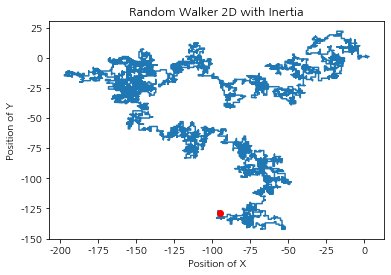

In [8]:
steps=int(input('Input steps : '))
result=randomWalker2D(steps)
plot(result[0],result[1])    #result[0] : x축, result[1] : y축
plot(result[0][-1],result[1][-1],'ro')    #최종 위치를 빨간 점으로 표시한다
xlabel('Position of X')
ylabel('Position of Y')
title('Random Walker 2D with Inertia')
show()

Input the number of spots : 10000


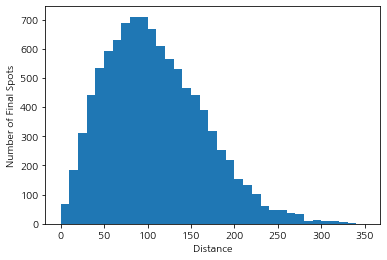

In [9]:
spots=int(input('Input the number of spots : '))
final_distance=list()    #최종 위치의 거리를 담을 리스트
xfinal=list()    #최종 x위치를 담을 리스트
yfinal=list()    #최종 y위치를 담을 리스트
average=0
for i in range(spots):
    result=randomWalker2D(steps)
    final_distance.append(distance(result[0][-1],result[1][-1]))    #리스트의 마지막 원소만을 담는다
    xfinal.append(result[0][-1])
    yfinal.append(result[1][-1])
    average+=distance(result[0][-1],result[1][-1])**2/spots

hist(final_distance,bins=list(range(0,360,10)))    #bins는 히스토그램 막대의 크기를 결정하는 인자
xlabel('Distance')
ylabel('Number of Final Spots')
title(f'Distanc)
show()

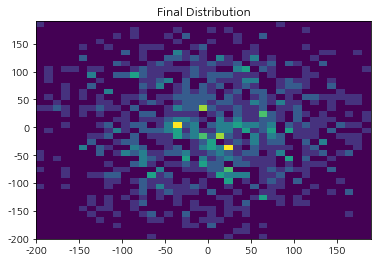

In [9]:
title('Final Distribution')
hist2d(xfinal,yfinal,bins=(list(range(-200,200,10)),list(range(-200,200,10))))    #array_like인자를 2개를 줄 수 있음 matplolib 라이브러리 참조
show()